In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train=np.mat(np.zeros((943,1682)))
validation=np.mat(np.zeros((943,1682)))

with open('./ml-100k/u1.base') as f:
    for line in f:
        user_id,item_id,rating,timestamp=line.split('\t')
        train[int(user_id)-1,int(item_id)-1]=int(rating)

with open('./ml-100k/u1.test') as f:
    for line in f:
        user_id,item_id,rating,timestamp=line.split('\t')
        validation[int(user_id)-1,int(item_id)-1]=int(rating)

In [3]:
def loss(R,R_pre):
    loss=.0
    count=0
    err=R-R_pre
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if R[i,j]!=0:
                loss+=err[i,j]**2
                count+=1
    return loss/float(count)

In [4]:
def SGD(P,Q,R,learning_rate,lm_p,lm_q):
    #随机选取一个样本
    while(True):
        user_id=np.random.randint(R.shape[0])
        item_id=np.random.randint(R.shape[1])
        if R[user_id,item_id]!=0:
            break
    #计算梯度并更新
    P[user_id,:]=P[user_id,:]+2*learning_rate*(R[user_id,item_id]-P[user_id,:]*Q[:,item_id])[0,0]*Q[:,item_id].T-lm_p*P[user_id,:]
    Q[:,item_id]=Q[:,item_id]+2*learning_rate*(R[user_id,item_id]-P[user_id,:]*Q[:,item_id])[0,0]*P[user_id,:].T-lm_q*Q[:,item_id]
    return P,Q

In [33]:
P=np.mat(np.random.random((943,10)))
Q=np.mat(np.random.random((10,1682)))
learning_rate=0.01
lm_q=0.00001
lm_p=0.00001
iter_num=40000
loss_validation=[]
loss_train=[]
loss_validation.append(loss(validation,P*Q))
for i in range(iter_num):
    P,Q=SGD(P,Q,train,learning_rate,lm_p,lm_q)
    if (i+1)%400==0: 
        loss_validation.append(loss(validation,P*Q))


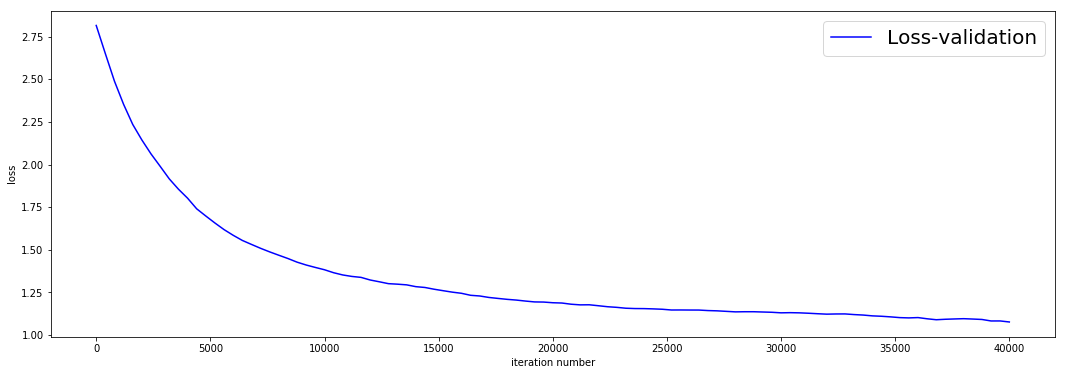

In [34]:
plt.figure(figsize=(18,6))
plt.plot([i*400 for i in range(len(loss_validation))],loss_validation,color='blue',label='Loss-validation')
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.legend(fontsize=20)
plt.show()